<a href="https://colab.research.google.com/github/Jingut/EX/blob/main/Exp_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

##1) 데이터 준비와 전처리

In [2]:
rating_file_path='/content/drive/MyDrive/aiffel/recommendata_iu/data/ml-1m/ratings.dat'
ratings_cols = ['user_id', 'movie_id', 'ratings', 'timestamp']
ratings = pd.read_csv(rating_file_path, sep='::', names=ratings_cols, engine='python', encoding = "ISO-8859-1")
orginal_data_size = len(ratings)
ratings.head()

,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
ratings_orignal = ratings.copy()
ratings_orignal_size = len(ratings)
print(ratings_orignal_size)

1000209


In [4]:
user_count_orignal = ratings_orignal.groupby('user_id')['movie_id'].count()
user_count_orignal.describe()

count    6040.000000
mean      165.597517
std       192.747029
min        20.000000
25%        44.000000
50%        96.000000
75%       208.000000
max      2314.000000
Name: movie_id, dtype: float64

In [5]:
user_median_orignal = ratings_orignal.groupby('user_id')['ratings'].median()
user_median_orignal.describe()

count    6040.000000
mean        3.840811
std         0.577449
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: ratings, dtype: float64

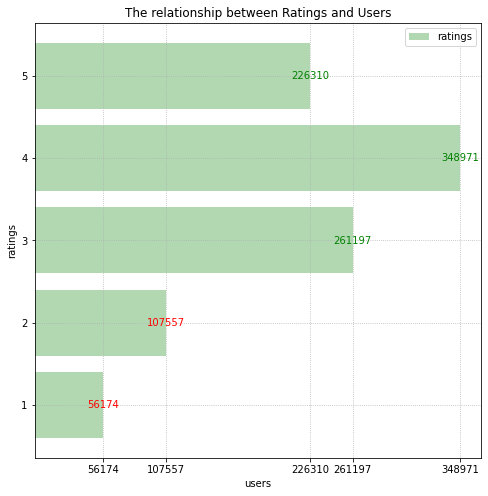

In [6]:
ratings_users = ratings.groupby(by=['ratings']).agg({'user_id': 'count'}).reset_index()
ratings_users.columns = ['ratings', 'users']
ratings_users_dic = {ratings:users for ratings, users in zip(ratings_users.ratings, ratings_users.users)}

plt.figure(figsize=(8,8))
plt.barh(ratings_users.ratings, ratings_users.users, align='center', alpha=0.3, color='g')
plt.yticks(ratings_users.ratings)
plt.xticks(ratings_users.users)
plt.legend(ratings_users.columns)
plt.ylabel('ratings')
plt.xlabel('users')
plt.grid(ls='dotted')
plt.title('The relationship between Ratings and Users')

for i, users in enumerate(ratings_users.users):
    if i >= 2:
        color = 'g'
    else:
        color = 'r'
    plt.text(users+i,1+i,users, horizontalalignment='center', verticalalignment='center', color=color)

plt.show()

In [7]:
# 3점 이상만 남깁니다.
ratings = ratings[ratings['ratings']>=3]
filtered_data_size = len(ratings)

print(f'orginal_data_size: {orginal_data_size}, filtered_data_size: {filtered_data_size}')
print(f'Ratio of Remaining Data is {filtered_data_size / orginal_data_size:.2%}')

orginal_data_size: 1000209, filtered_data_size: 836478
Ratio of Remaining Data is 83.63%


In [8]:
# ratings 컬럼의 이름을 counts로 바꿉니다.
ratings.rename(columns={'ratings':'counts'}, inplace=True)
ratings['counts']

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


0          5
1          3
2          3
3          4
4          5
          ..
1000203    3
1000205    5
1000206    5
1000207    4
1000208    4
Name: counts, Length: 836478, dtype: int64

In [9]:
# 유저별 몇 개의 영화를 보고 있는지에 대한 통계
user_count = ratings.groupby('user_id')['movie_id'].count()
user_count.describe()

count    6039.000000
mean      138.512668
std       156.241599
min         1.000000
25%        38.000000
50%        81.000000
75%       177.000000
max      1968.000000
Name: movie_id, dtype: float64

In [10]:
# 유저별 시청횟수 중앙값에 대한 통계
user_median = ratings.groupby('user_id')['counts'].median()
user_median.describe()

count    6039.000000
mean        4.055970
std         0.432143
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: counts, dtype: float64

In [11]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings

,user_id,movie_id,counts,timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11
...,...,...,...,...
1000203,6040,1090,3,2000-04-26 02:18:38
1000205,6040,1094,5,2000-04-25 23:21:27
1000206,6040,562,5,2000-04-25 23:19:06
1000207,6040,1096,4,2000-04-26 02:20:48


In [12]:
# 결측치 확인
ratings.isna().sum()

user_id      0
movie_id     0
counts       0
timestamp    0
dtype: int64

In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836478 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    836478 non-null  int64         
 1   movie_id   836478 non-null  int64         
 2   counts     836478 non-null  int64         
 3   timestamp  836478 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.9 MB


In [14]:
ratings_user_1 = (ratings['user_id']==ratings.loc[0, 'user_id'])
movies_user_1 = ratings.loc[ratings_user_1]
print(f'user_1 이 시청한 영화 개수: {len(movies_user_1)}')
movies_user_1

user_1 이 시청한 영화 개수: 53


,user_id,movie_id,counts,timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11
5,1,1197,3,2000-12-31 22:37:48
6,1,1287,5,2000-12-31 22:33:59
7,1,2804,5,2000-12-31 22:11:59
8,1,594,4,2000-12-31 22:37:48
9,1,919,4,2000-12-31 22:22:48


In [15]:
# 영화 제목을 보기 위해 메타 데이터를 읽어옵니다.
movie_file_path='/content/drive/MyDrive/aiffel/recommendata_iu/data/ml-1m/movies.dat'
cols = ['movie_id', 'title', 'genre'] 
movies = pd.read_csv(movie_file_path, sep='::', names=cols, engine='python', encoding='ISO-8859-1')
movies

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [16]:
movies_orignal = movies.copy()
movies_orignal_size = len(movies)
print(movies_orignal_size)

3883


In [17]:
movies['genre'] = movies['genre'].str.replace(pat =r'([|])',repl=r' ', regex=True)
# movies['title'] = movies['title'].str.replace(pat =r'([(0-9)])',repl=r'', regex=True)
movies['title'] = movies['title'].str.replace(pat =r'([|])',repl=r' ', regex=True)
movies

,movie_id,title,genre
0,1,Toy Story (1995),Animation Children's Comedy
1,2,Jumanji (1995),Adventure Children's Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [18]:
movies.isna().sum()

movie_id    0
title       0
genre       0
dtype: int64

In [19]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genre     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [20]:
# ratings 와 movies 데이터 프레임 합치기
ratings = ratings.join(movies.set_index('movie_id'), on='movie_id')
ratings.head(10)

,user_id,movie_id,counts,timestamp,title,genre
0,1,1193,5,2000-12-31 22:12:40,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,2000-12-31 22:35:09,James and the Giant Peach (1996),Animation Children's Musical
2,1,914,3,2000-12-31 22:32:48,My Fair Lady (1964),Musical Romance
3,1,3408,4,2000-12-31 22:04:35,Erin Brockovich (2000),Drama
4,1,2355,5,2001-01-06 23:38:11,"Bug's Life, A (1998)",Animation Children's Comedy
5,1,1197,3,2000-12-31 22:37:48,"Princess Bride, The (1987)",Action Adventure Comedy Romance
6,1,1287,5,2000-12-31 22:33:59,Ben-Hur (1959),Action Adventure Drama
7,1,2804,5,2000-12-31 22:11:59,"Christmas Story, A (1983)",Comedy Drama
8,1,594,4,2000-12-31 22:37:48,Snow White and the Seven Dwarfs (1937),Animation Children's Musical
9,1,919,4,2000-12-31 22:22:48,"Wizard of Oz, The (1939)",Adventure Children's Drama Musical


In [21]:
movies_detail_user_1 = ratings[ratings['user_id']==1]
print(f'user_1 이 시청한 영화 개수: {len(movies_detail_user_1)}')
movies_detail_user_1

user_1 이 시청한 영화 개수: 53


,user_id,movie_id,counts,timestamp,title,genre
0,1,1193,5,2000-12-31 22:12:40,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,2000-12-31 22:35:09,James and the Giant Peach (1996),Animation Children's Musical
2,1,914,3,2000-12-31 22:32:48,My Fair Lady (1964),Musical Romance
3,1,3408,4,2000-12-31 22:04:35,Erin Brockovich (2000),Drama
4,1,2355,5,2001-01-06 23:38:11,"Bug's Life, A (1998)",Animation Children's Comedy
5,1,1197,3,2000-12-31 22:37:48,"Princess Bride, The (1987)",Action Adventure Comedy Romance
6,1,1287,5,2000-12-31 22:33:59,Ben-Hur (1959),Action Adventure Drama
7,1,2804,5,2000-12-31 22:11:59,"Christmas Story, A (1983)",Comedy Drama
8,1,594,4,2000-12-31 22:37:48,Snow White and the Seven Dwarfs (1937),Animation Children's Musical
9,1,919,4,2000-12-31 22:22:48,"Wizard of Oz, The (1939)",Adventure Children's Drama Musical


##2) 분석해 봅시다.


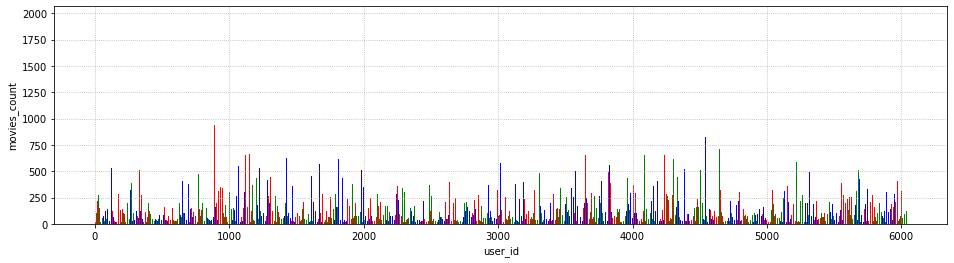

In [22]:
user_counts = ratings.groupby(by=['user_id']).agg({'movie_id': 'count'}).reset_index()
user_counts.columns = ['user_id', 'movies_count']

plt.figure(figsize=(16,4))
plt.bar(user_counts.user_id, user_counts.movies_count, color=['r','g','b'])
plt.xlabel('user_id')
plt.ylabel('movies_count')
plt.grid(ls='dotted')
plt.show()

In [23]:
top_30 = user_counts.sort_values(by=['movies_count'], ascending=False).head(30)
top_30

,user_id,movies_count
4167,4169,1968
4275,4277,1715
1679,1680,1515
3616,3618,1146
1014,1015,1145
5829,5831,1136
2908,2909,1119
1940,1941,1116
423,424,1106
1979,1980,1054


In [24]:
bottom_30 = user_counts.sort_values(by=['movies_count'], ascending=True).head(30)
bottom_30

,user_id,movies_count
4484,4486,1
4347,4349,7
4634,4636,9
4363,4365,9
1101,1102,9
4054,4056,9
940,941,10
5848,5850,11
5826,5828,11
3640,3642,11


ratings에 있는 유니크한 영화 개수

In [25]:
# 영화 개수
ratings['movie_id'].nunique()

3628

ratings에 있는 유니크한 사용자 수

In [26]:
# 사용자 수
ratings['user_id'].nunique()

6039

가장 인기 있는 영화 30개(인기순)

In [27]:
# 인기 많은 영화 내림차순 30개
movie_count = ratings.groupby(by=['movie_id', 'title'])['user_id'].count()
movie_count.sort_values(ascending=False).head(30)

movie_id  title                                                
2858      American Beauty (1999)                                   3211
260       Star Wars: Episode IV - A New Hope (1977)                2910
1196      Star Wars: Episode V - The Empire Strikes Back (1980)    2885
1210      Star Wars: Episode VI - Return of the Jedi (1983)        2716
2028      Saving Private Ryan (1998)                               2561
589       Terminator 2: Judgment Day (1991)                        2509
593       Silence of the Lambs, The (1991)                         2498
1198      Raiders of the Lost Ark (1981)                           2473
1270      Back to the Future (1985)                                2460
2571      Matrix, The (1999)                                       2434
480       Jurassic Park (1993)                                     2413
2762      Sixth Sense, The (1999)                                  2385
608       Fargo (1996)                                             2371


##3) 내가 선호하는 영화를 5가지 골라서 ratings에 추가해 줍시다.


In [28]:
# 영화 제목으로 장르 추출하는 함수
def get_genre_of_movie(my_favorite):
    genres_of_my_favorite = []
    for k, v in my_favorite.items():
        genres_of_my_favorite.extend(movies[movies['title'] == v]['genre'].to_list())
    return genres_of_my_favorite

In [29]:
# 현재 시간
now = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

# 영화 데이터 추가! 단, 이름은 꼭 데이터셋에 있는 것과 동일하게 맞춰주세요.
my_favorite = {
    70: "From Dusk Till Dawn (1996)",
    164: "Devil in a Blue Dress (1995)",
    293: "Professional, The (a.k.a. Leon: The Professional) (1994)",
    426: "Body Snatchers (1993)",
    3476: "Jacob's Ladder (1990)",
}

# 6041이라는 user_id가 위 영화를 counts회씩 시청했다고 가정하겠습니다.
my_playlist = pd.DataFrame({
    'user_id': [6041]*5,
    'movie_id': my_favorite.keys(),
    'counts': [3,4,4,5,5],
    'timestamp': [now]*5,
    'title': my_favorite.values(),
    'genre': get_genre_of_movie(my_favorite)
})

if not ratings.isin({'user_id':[6041]})['user_id'].any():  # user_id에 6041이라는 데이터가 없다면
    ratings = ratings.append(my_playlist)  # my_favorite 데이터 추가

ratings.tail(10)  # 잘 추가되었는지 확인해 봅시다.

,user_id,movie_id,counts,timestamp,title,genre
1000203,6040,1090,3,2000-04-26 02:18:38,Platoon (1986),Drama War
1000205,6040,1094,5,2000-04-25 23:21:27,"Crying Game, The (1992)",Drama Romance War
1000206,6040,562,5,2000-04-25 23:19:06,Welcome to the Dollhouse (1995),Comedy Drama
1000207,6040,1096,4,2000-04-26 02:20:48,Sophie's Choice (1982),Drama
1000208,6040,1097,4,2000-04-26 02:19:29,E.T. the Extra-Terrestrial (1982),Children's Drama Fantasy Sci-Fi
0,6041,70,3,2022-09-05 06:54:49,From Dusk Till Dawn (1996),Action Comedy Crime Horror Thriller
1,6041,164,4,2022-09-05 06:54:49,Devil in a Blue Dress (1995),Crime Film-Noir Mystery Thriller
2,6041,293,4,2022-09-05 06:54:49,"Professional, The (a.k.a. Leon: The Profession...",Crime Drama Romance Thriller
3,6041,426,5,2022-09-05 06:54:49,Body Snatchers (1993),Horror Sci-Fi Thriller
4,6041,3476,5,2022-09-05 06:54:49,Jacob's Ladder (1990),Horror Mystery Thriller


In [30]:
# 고유한 유저, 영화를 찾아내는 코드
user_unique = ratings['user_id'].unique()
# movie_unique = ratings['movie_id'].unique()
movie_unique = ratings['title'].unique()

# 유저, 영화 indexing 하는 코드 idx는 index의 약자입니다.
user_to_idx = {v:k for k,v in enumerate(user_unique)}
movie_to_idx = {v:k for k,v in enumerate(movie_unique)}

In [31]:
# 인덱싱이 잘 되었는지 확인해 봅니다. 
print('user_id indexing: {}\n'.format(user_to_idx[6041]))

for k, v in my_favorite.items():
    print('movie_id indexing: {}'.format(movie_to_idx[v]))

user_id indexing: 6039

movie_id indexing: 1034
movie_id indexing: 864
movie_id indexing: 890
movie_id indexing: 2361
movie_id indexing: 279


In [32]:
# indexing을 통해 데이터 컬럼 내 값을 바꾸는 코드
# dictionary 자료형의 get 함수는 https://wikidocs.net/16 을 참고하세요.

# user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구해 봅시다. 
# 혹시 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN이 될 테니 dropna()로 제거합니다. 
temp_user_ratings = ratings['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_ratings) == len(ratings):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    ratings['user_id'] = temp_user_ratings   # ratings['user_id']을 인덱싱된 Series로 교체해 줍니다. 
else:
    print('user_id column indexing Fail!!')

# movie_to_idx을 통해 movie 컬럼도 동일한 방식으로 인덱싱해 줍니다. 
# temp_movie_ratings = ratings['movie_id'].map(movie_to_idx.get).dropna()
temp_movie_ratings = ratings['title'].map(movie_to_idx.get).dropna()
if len(temp_movie_ratings) == len(ratings):
    print('movie column indexing OK!!')
    ratings['movie_id'] = temp_movie_ratings
else:
    print('movie column indexing Fail!!')

ratings.tail(10)

user_id column indexing OK!!
movie column indexing OK!!


,user_id,movie_id,counts,timestamp,title,genre
1000203,6038,1030,3,2000-04-26 02:18:38,Platoon (1986),Drama War
1000205,6038,986,5,2000-04-25 23:21:27,"Crying Game, The (1992)",Drama Romance War
1000206,6038,311,5,2000-04-25 23:19:06,Welcome to the Dollhouse (1995),Comedy Drama
1000207,6038,142,4,2000-04-26 02:20:48,Sophie's Choice (1982),Drama
1000208,6038,26,4,2000-04-26 02:19:29,E.T. the Extra-Terrestrial (1982),Children's Drama Fantasy Sci-Fi
0,6039,1034,3,2022-09-05 06:54:49,From Dusk Till Dawn (1996),Action Comedy Crime Horror Thriller
1,6039,864,4,2022-09-05 06:54:49,Devil in a Blue Dress (1995),Crime Film-Noir Mystery Thriller
2,6039,890,4,2022-09-05 06:54:49,"Professional, The (a.k.a. Leon: The Profession...",Crime Drama Romance Thriller
3,6039,2361,5,2022-09-05 06:54:49,Body Snatchers (1993),Horror Sci-Fi Thriller
4,6039,279,5,2022-09-05 06:54:49,Jacob's Ladder (1990),Horror Mystery Thriller


In [33]:
ratings.isna().sum()

user_id      0
movie_id     0
counts       0
timestamp    0
title        0
genre        0
dtype: int64

In [34]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836483 entries, 0 to 4
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    836483 non-null  int64 
 1   movie_id   836483 non-null  int64 
 2   counts     836483 non-null  int64 
 3   timestamp  836483 non-null  object
 4   title      836483 non-null  object
 5   genre      836483 non-null  object
dtypes: int64(3), object(3)
memory usage: 44.7+ MB


In [35]:
# 총 데이터 개수
all_data = len(ratings)
print(f'All data: {all_data}\n')

# n회 시청한 데이터의 비율을 보는 코드
view_counts = set(ratings['counts'])
ratio_list = []
for n in view_counts:
    only_num = ratings[ratings['counts']==n]
    len_only_num = len(only_num)  # n회 시청한 데이터 개수
    ratio = len_only_num/all_data
    ratio_list.append(ratio)

    print(f'Only {n} data: {len_only_num}, Ratio: {ratio:.2%}')

All data: 836483

Only 3 data: 261198, Ratio: 31.23%
Only 4 data: 348973, Ratio: 41.72%
Only 5 data: 226312, Ratio: 27.06%


##4)CSR matrix

In [36]:
from scipy.sparse import csr_matrix

num_user = ratings['user_id'].nunique()
num_movie = ratings['movie_id'].nunique()

csr_data = csr_matrix((ratings.counts, (ratings.user_id, ratings.movie_id)), shape= (num_user, num_movie))
csr_data

<6040x3628 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Row format>

In [37]:
csr_data.shape

(6040, 3628)

In [38]:
!pip install implicit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##5) als_model = AlternatingLeastSquares 모델을 직접 구성하여 훈련시켜 봅시다.

In [39]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

# implicit 라이브러리에서 권장하고 있는 부분입니다. 학습 내용과는 무관합니다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

In [40]:
als_model = AlternatingLeastSquares(factors=300, regularization=0.01, use_gpu=False, iterations=15, dtype=np.float32)

In [41]:
# 모델 훈련
als_model.fit(csr_data)

  0%|          | 0/15 [00:00<?, ?it/s]

In [42]:
user = user_to_idx[6041]
user_vector = als_model.user_factors[user]
user_vector  # 사용자 벡터

array([-0.19820513,  0.57387197, -0.41907609, -0.3861005 , -0.10675608,
       -0.21906757, -0.00495977,  0.42095864,  0.511969  ,  0.18386185,
       -0.07518692,  0.36209333, -0.41733843,  0.52348006,  0.37772658,
       -0.46422145,  0.35216287, -0.39951152, -0.10438665, -0.13104022,
       -0.1682068 , -0.09019391, -0.3641137 ,  0.44776097,  0.7287098 ,
        0.0275952 , -0.10409996,  0.06929062, -0.05817655,  0.2977516 ,
        0.2659712 ,  0.36597723, -0.31787044,  0.36214834, -0.46475464,
       -0.10400523,  0.13219626,  0.18534182, -0.4740708 ,  0.18317202,
        0.23046699,  0.24880172, -0.35326162, -0.537311  , -0.24445082,
       -0.29259673,  0.10339288, -0.4792393 ,  0.6718586 ,  0.19745898,
        0.1488026 , -0.42959848, -0.32215288, -0.0892854 ,  0.2591727 ,
        0.34659505, -0.16354622,  0.2536972 ,  0.2853571 , -0.0875909 ,
       -0.51621366, -0.09978074,  0.33835337, -0.04322335, -0.42282534,
        0.11558013, -0.15582642,  0.345462  , -0.26677114,  0.12

In [43]:
star_wars = movie_to_idx['Star Wars: Episode IV - A New Hope (1977)']
star_wars_vector = als_model.item_factors[star_wars]
star_wars_vector  # 영화 벡터

array([-0.01376077, -0.01920435, -0.01771872, -0.00277418, -0.00716787,
        0.01685794,  0.02753293, -0.02568556, -0.00579122,  0.01310625,
       -0.01329189,  0.00604697, -0.01036679, -0.00162987,  0.01572355,
        0.02106091, -0.00784225,  0.00443049, -0.00313662,  0.00746709,
       -0.00504553,  0.00085665,  0.01972852,  0.00498121,  0.00699504,
        0.00473689, -0.01133598,  0.01496072, -0.00944063, -0.00655403,
        0.00056177, -0.00186082,  0.02342248, -0.01550464,  0.00754323,
        0.03237404,  0.036346  ,  0.01877362,  0.00200132, -0.00069008,
        0.01579115,  0.00050857,  0.00457383, -0.01116773,  0.01977998,
        0.02461682, -0.00617511,  0.00624547,  0.00568509, -0.01598362,
        0.00186813,  0.00267757,  0.01020983,  0.0291972 , -0.00503584,
        0.01268491,  0.0070194 , -0.00680605,  0.00674537,  0.00947756,
        0.01544334, -0.00746248,  0.01222483,  0.01053263,  0.04341207,
       -0.01685495,  0.02055273,  0.00531599,  0.01133495,  0.02

In [44]:
# user와 star_wars_epi_4를 내적하는 코드
np.dot(user_vector, star_wars_vector)

-0.058252126

In [45]:
toy_story_2 = movie_to_idx['Ghostbusters (1984)']
toy_story_2_vector = als_model.item_factors[toy_story_2]
np.dot(user_vector, toy_story_2_vector)

0.05183637

##6) 내가 선호하는 5가지 영화 중 하나와 그 외의 영화 하나를 골라 훈련된 모델이 예측한 나의 선호도를 파악해 보세요.

In [46]:
def predict_my_preference(user_vector, title, print_flag=True):
    movie = movie_to_idx.get(title, 0)
    movie_vector = als_model.item_factors[movie]

    # user_vector와 movie_vector를 내적하는 코드
    dot_user_movie = np.dot(user_vector, movie_vector)
    if print_flag:
        print(f'* user_vector 와 movie_vector({title}) 를 내적한 결과: {dot_user_movie:.2f}')
    else:
        return round(dot_user_movie, 2)

In [47]:
predict_my_preference(user_vector, 'Ghostbusters (1984) ')

* user_vector 와 movie_vector(Ghostbusters (1984) ) 를 내적한 결과: -0.12


In [48]:
for movie_id, movie_title in my_favorite.items():
    predict_my_preference(user_vector, movie_title)

* user_vector 와 movie_vector(From Dusk Till Dawn (1996)) 를 내적한 결과: 0.49
* user_vector 와 movie_vector(Devil in a Blue Dress (1995)) 를 내적한 결과: 0.46
* user_vector 와 movie_vector(Professional, The (a.k.a. Leon: The Professional) (1994)) 를 내적한 결과: 0.70
* user_vector 와 movie_vector(Body Snatchers (1993)) 를 내적한 결과: 0.36
* user_vector 와 movie_vector(Jacob's Ladder (1990)) 를 내적한 결과: 0.62


In [49]:
my_prefer = []
for title in movies['title'].to_list():
    my_prefer.append(predict_my_preference(user_vector, title, False))

In [50]:
movies.insert(len(movies.columns), 'my_prefer', my_prefer, allow_duplicates=True)
movies

,movie_id,title,genre,my_prefer
0,1,Toy Story (1995),Animation Children's Comedy,-0.06
1,2,Jumanji (1995),Adventure Children's Fantasy,-0.03
2,3,Grumpier Old Men (1995),Comedy Romance,0.00
3,4,Waiting to Exhale (1995),Comedy Drama,0.08
4,5,Father of the Bride Part II (1995),Comedy,-0.01
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,-0.02
3879,3949,Requiem for a Dream (2000),Drama,-0.06
3880,3950,Tigerland (2000),Drama,-0.03
3881,3951,Two Family House (2000),Drama,-0.01


In [51]:
movies[movies['my_prefer'] >= 0.6]

,movie_id,title,genre,my_prefer
290,293,"Professional, The (a.k.a. Leon: The Profession...",Crime Drama Romance Thriller,0.70
3407,3476,Jacob's Ladder (1990),Horror Mystery Thriller,0.62


In [52]:
favorite_movie = 'Sixth Sense, The (1999)'
movie_title = movie_to_idx[favorite_movie]
similar_movies = als_model.similar_items(movie_title, N=15)
similar_movies

(array([  38, 2931, 2964,  853, 1976,  808, 2432, 2803, 1867, 3327, 3173,
        2727, 1872, 3377, 3333], dtype=int32),
 array([1.0000001 , 0.28864294, 0.2847623 , 0.2842738 , 0.28336555,
        0.28320146, 0.28255934, 0.28171837, 0.27812642, 0.27740836,
        0.27718168, 0.2767972 , 0.27643943, 0.2760943 , 0.27606016],
       dtype=float32))

In [53]:
similar_movies[0]

array([  38, 2931, 2964,  853, 1976,  808, 2432, 2803, 1867, 3327, 3173,
       2727, 1872, 3377, 3333], dtype=int32)

In [54]:
similar_movies[1]

array([1.0000001 , 0.28864294, 0.2847623 , 0.2842738 , 0.28336555,
       0.28320146, 0.28255934, 0.28171837, 0.27812642, 0.27740836,
       0.27718168, 0.2767972 , 0.27643943, 0.2760943 , 0.27606016],
      dtype=float32)

In [55]:
# movie_to_idx 를 뒤집어, index로부터 movie 이름을 얻는 dict를 생성합니다. 
idx_to_movie = {v:k for k,v in movie_to_idx.items()}
[idx_to_movie[i] for i in similar_movies[0]]

['Sixth Sense, The (1999)',
 'Communion (a.k.a. Alice, Sweet Alice/Holy Terror) (1977)',
 'Shattered Image (1998)',
 'Drive Me Crazy (1999)',
 'Kansas City (1996)',
 'End of Days (1999)',
 'Crazy in Alabama (1999)',
 'Hideous Sun Demon, The (1959)',
 'Faithful (1996)',
 'Outlaw, The (1943)',
 "Isn't She Great? (2000)",
 'Innocents, The (1961)',
 'Kidnapped (1960)',
 'Skipped Parts (2000)',
 'Heaven (1998)']

##7) 내가 좋아하는 영화와 비슷한 영화를 추천받아 봅시다.

In [56]:
def get_similar_movie(movie_name: str):
    movie_title = movie_to_idx[movie_name]
    similar_movie = als_model.similar_items(movie_title, N=15)
    similar_movie = [idx_to_movie[i] for i in similar_movie[0]]
    return similar_movie

In [57]:
get_similar_movie('Princess Bride, The (1987)')

['Princess Bride, The (1987)',
 'Killing of Sister George, The (1968)',
 '3 Strikes (2000)',
 "Greaser's Palace (1972)",
 'Amityville 3-D (1983)',
 'Meatballs 4 (1992)',
 'Sacco and Vanzetti (Sacco e Vanzetti) (1971)',
 'Innocents, The (1961)',
 "Rich Man's Wife, The (1996)",
 'Skipped Parts (2000)',
 'Train of Life (Train De Vie) (1998)',
 'Diamonds (1999)',
 'Search for One-eye Jimmy, The (1996)',
 'No Looking Back (1998)',
 'Jeanne and the Perfect Guy (Jeanne et le garçon formidable) (1998)']

##8) 내가 가장 좋아할 만한 영화들을 추천받아 봅시다.

In [58]:
user = user_to_idx[6041]
# recommend에서는 user*item CSR Matrix를 받습니다.
movie_recommended = als_model.recommend(user, csr_data[user], N=20, filter_already_liked_items=True)
movie_recommended

(array([ 831,  299, 1368, 1078, 1070,  269, 1709,  174, 1113,  281,  440,
         250,  453,  289, 1090,  855,  117,   93,  794,  870], dtype=int32),
 array([0.30942845, 0.21974684, 0.20090105, 0.17595574, 0.17341015,
        0.16103448, 0.157924  , 0.15705714, 0.1540527 , 0.15248409,
        0.1514895 , 0.1486149 , 0.14757109, 0.14451125, 0.14364597,
        0.14352015, 0.13807209, 0.13763991, 0.13623117, 0.13612589],
       dtype=float32))

In [59]:
[idx_to_movie[i] for i in movie_recommended[0]]

["Devil's Advocate, The (1997)",
 'Mariachi, El (1992)',
 'Henry: Portrait of a Serial Killer (1990)',
 'Serial Mom (1994)',
 'Long Kiss Goodnight, The (1996)',
 'GoodFellas (1990)',
 'Thin Man, The (1934)',
 'Blade (1998)',
 'Dead Again (1991)',
 'Casino (1995)',
 'True Romance (1993)',
 'Edward Scissorhands (1990)',
 'Boogie Nights (1997)',
 'Reservoir Dogs (1992)',
 'Nikita (La Femme Nikita) (1990)',
 'Grifters, The (1990)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Alien: Resurrection (1997)',
 'Arlington Road (1999)',
 'Big Sleep, The (1946)']

In [60]:
item_movie = movie_to_idx['Toy Story (1995)']
explain = als_model.explain(user, csr_data, itemid=item_movie)

In [61]:
[(idx_to_movie[i[0]], i[1]) for i in explain[1]]

[('From Dusk Till Dawn (1996)', 0.02220031200478932),
 ('Body Snatchers (1993)', -0.0014480418513153474),
 ("Jacob's Ladder (1990)", -0.007169892374068877),
 ('Professional, The (a.k.a. Leon: The Professional) (1994)',
  -0.017508216806781246),
 ('Devil in a Blue Dress (1995)', -0.05610509957503235)]

#결론
이번에는 영화데이터를 가지고 다양한 조건으로 추천을 해주는 시스템을 만들어 보았습니다.
als_model = AlternatingLeastSquares 모델을 직접 구성하여 훈련해보았고 그 결과로
내가 좋아하는 영화와 비슷한 영화를 추천받기 및 내가 가장 좋아할 만한 영화들을 추천받아 보는 등의 태스크를 진행해보았습니다.

# 회고

---



## - 이번 프로젝트에서 어려웠던 점
오랜만에 데이터프레임을 만지다 보니 join이나 groupby를 사용할 때 어려움을 겪었고 원하는 정보를 얻기 위해서 테이블에서 원하는 컬럼을 가져와 새로운 테이블을 만드는것도 익숙치 않았습니다.
그리고 데이터형식을 맞추는게 아직도 쉽지않았습니다 예를 들어 2차원 배열을 딕셔너리와 헷갈리는 등의 이슈가 있었습니다. 


---


## - 프로젝트를 진행하면서 알게된 점
딕셔너리와 2차원 배열의 차이를 알게되었습니다.

정규표현식을 조금 더 다양하게 사용하는 방법을 알게되었습니다.

추천시스템의 기본적인 알고리즘을 알게 되었습니다.


---


## - 루브릭 평가지표를 맞추기 위해 시도한 것들
데이터 전처리를 정규표현식을 통해 조금 다듬는 시도를 해보았습니다.

데이터를 다양한 그래프를 통해 분석하여 순위와 유저의 관계를 알아보았습니다.


---


## - 자기다짐
아직도 데이터프레임을 만지는게 익숙치 않다고 느꼈고 정규표현식 또한 공부가 더 필요하다고 느꼈습니다.

SQL과 비슷한 join, group by등을 조금 더 익숙하게 사용할 수 있어야 겠다고 생각했습니다. 

